In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import regex as re

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [30]:
df.shape

(37249, 2)

In [31]:
df.sample()['clean_comment'].values

array(['yikes hasn even been month since his fan shot that mosque '],
      dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


### Data Wrangling

In [33]:
# Missing values
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [34]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [35]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
# Check duplicates
df.duplicated().sum()

np.int64(350)

In [38]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [39]:
df.drop_duplicates(inplace=True)

In [40]:
# Check for empty rows
df[df['clean_comment'].str.strip() == '']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [41]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [42]:
df[df['clean_comment'].str.strip() == ''] #<- verify

,clean_comment,category


### Data preprocessing

In [43]:
# Convert to Lower Case
def lower_case(text):
    return ' '.join(word.lower() for word in text.split())

In [44]:
df['clean_comment'] = df['clean_comment'].apply(lower_case)

In [46]:
# Check URLS
def removing_urls(text): 
    '''
    Removing all the urls
    '''
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [49]:
df['clean_comment'] = df['clean_comment'].apply(removing_urls)

In [50]:
# Removing Comments with new line characters
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

### EDA

In [54]:
df['category'] = df['category'].replace({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})

<Axes: xlabel='category', ylabel='count'>

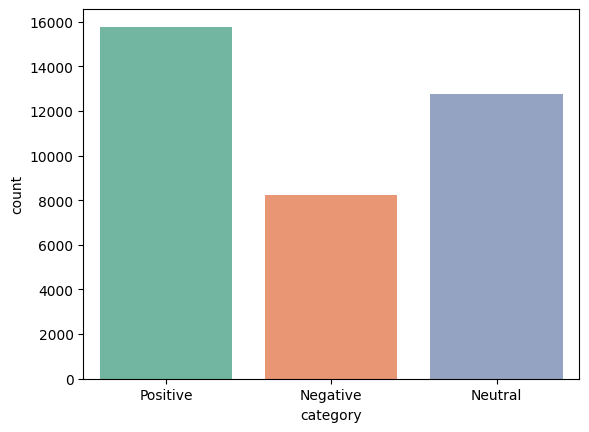

In [55]:
# Distribution of classes
sns.countplot(data=df, x='category', palette='Set2')

In [59]:
# Frequency Distribution of sentiments
df['category'].value_counts(normalize=True).to_frame().mul(100).round(2)

,proportion
category,
Positive,42.86
Neutral,34.71
Negative,22.42


In [60]:
# Visualizing the Word_count
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

Text(0.5, 1.0, 'Distribution of Word Count in each doc')

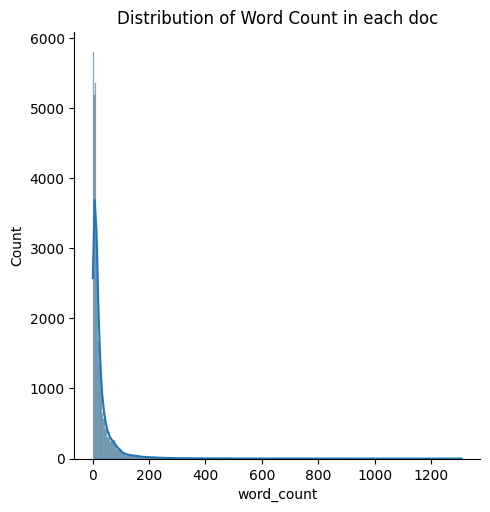

In [62]:
sns.displot(data=df, x='word_count', kde=True)
plt.title('Distribution of Word Count in each doc')

Text(0.5, 1.0, 'Distribution of word count for each sentiment')

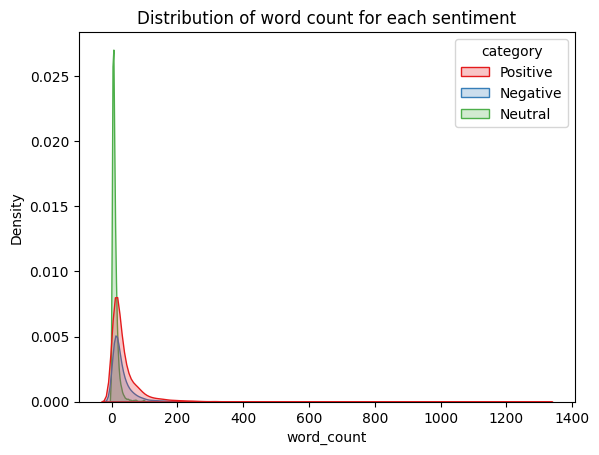

In [69]:
# Word count for each sentiment
sns.kdeplot(data=df, x='word_count', hue='category', fill=True, palette='Set1')
plt.title('Distribution of word count for each sentiment')

- **Positive comments** These tend to have wider spread in word count, indicating that longer comments are more common in positive sentiments.
- **Neutral comments** The distribution shows a relatively lower frequency and is more concentrated around the shorter comments compared to positive or negative ones.
- **Negative comments** These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: xlabel='category', ylabel='word_count'>

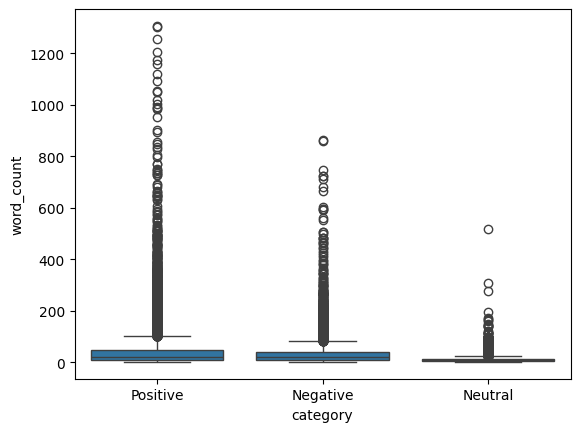

In [70]:
# Box Plot for word count sentiment
sns.boxplot(data=df, x='category', y='word_count')

- **Positive comments** The median word count is relatively high, and there are several outliers with longer comments indicating that positive comments tend to be more verbose.
- **Neutral comments** The median word count is the lowest, with a tighter interquantile range (IQR), suggesting that neutral comments are generally shorter.
- **Negative comments** The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

In [71]:
# Visulizing Stop Words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Koshti's\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# Define English stopwords
stop_words = set(stopwords.words('english'))

# Create new col
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

Text(0.5, 1.0, 'Distribution of stopword count sentiment')

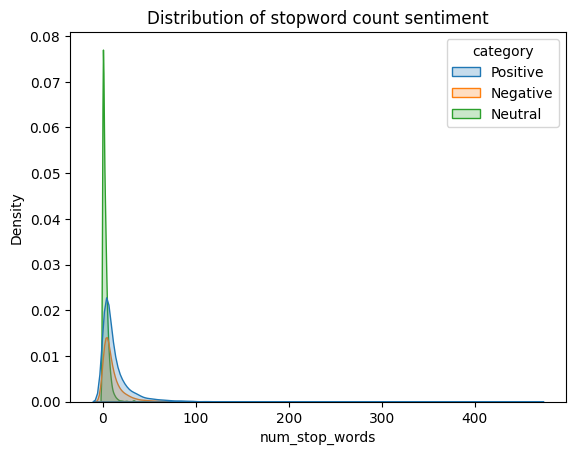

In [80]:
sns.kdeplot(data=df, x='num_stop_words', hue='category', fill=True)
plt.title('Distribution of stopword count sentiment')

In [81]:
# Visualize most frequent stopwords
from collections import Counter

In [83]:
# Store all stop words
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Get most common
most_common_stop_words = Counter(all_stop_words).most_common(25)
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

Text(0.5, 1.0, 'Top 25 Most Common Stop Words')

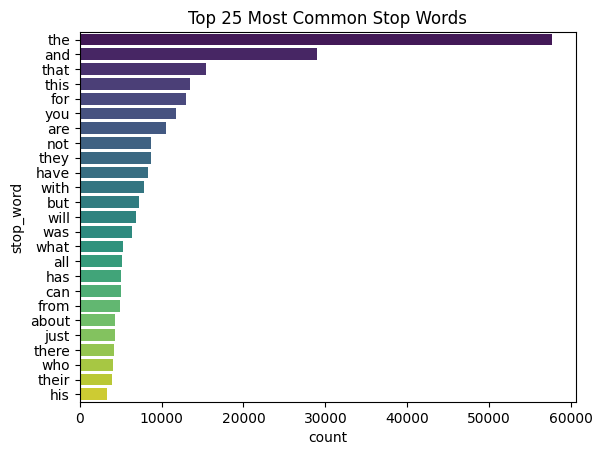

In [84]:
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')

In [87]:
# Add Column Num of Chars
df['num_chars'] = df['clean_comment'].apply(len)
df['num_chars'].describe().to_frame()

,num_chars
count,36793.000000
mean,181.849292
std,359.700012
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [91]:
# Count Punctuation
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
37153,cool real pilot,Positive,3,0,15,0
14242,have the most loving allies,Positive,5,3,27,0
7820,hat jya tau paache nachan jee bhar,Neutral,7,0,34,0
6541,the bureaucracy supposed obey the command the ...,Positive,38,16,259,0
13212,found next candidate from bjp,Neutral,5,1,29,0


In [92]:
df['num_punctuation_chars'].describe().to_frame()

,num_punctuation_chars
count,36793.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [115]:
from sklearn.feature_extraction.text import CountVectorizer

# Func to extract top 25 bigrams
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    bow = vec.fit_transform(corpus)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_bigrams(df['clean_comment'], 25)

# Convert the bigrams into DataFrame
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

Text(0.5, 1.0, 'Top 25 Most common Bigrams')

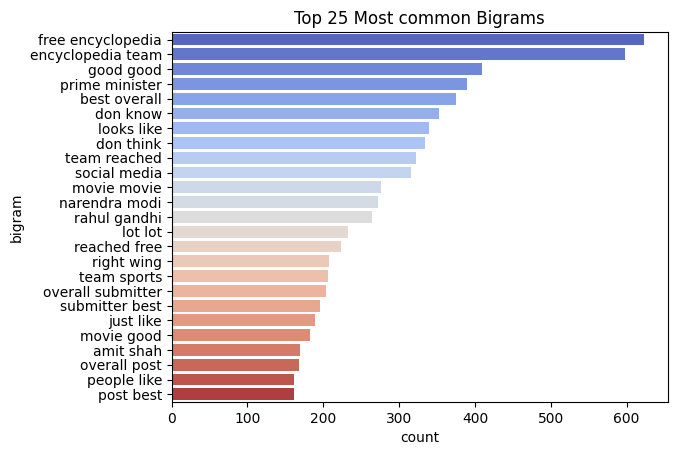

In [119]:
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='coolwarm')
plt.title('Top 25 Most common Bigrams')

In [117]:
# Func to extract top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english')
    bow = vec.fit_transform(corpus)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the bigrams into DataFrame
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

Text(0.5, 1.0, 'Top 25 Most common Trigrams')

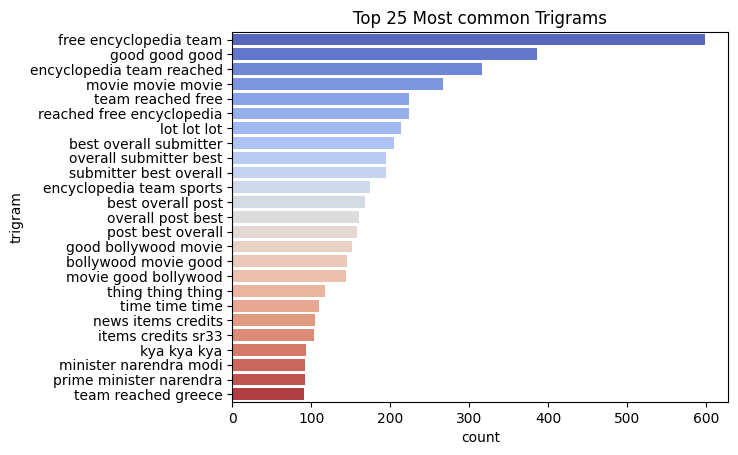

In [120]:
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most common Trigrams')

In [121]:
# Remove non-English Characters
df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [123]:
all_test = ' '.join(df['clean_comment'])
char_freq = Counter(all_text)
char_freq_df = pd.DataFrame(char_freq.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_freq_df

,character,frequency
6,,1091554
12,e,666610
13,t,491287
1,a,481134
3,i,401388
...,...,...
390,◢,1
393,­,1
1342,统,1
1343,☝,1


In [124]:
# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [125]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Koshti's\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,Positive,39,13,259,0
1,buddhism much lot compatible christianity espe...,Positive,196,59,1268,0
2,seriously say thing first get complex explain ...,Negative,86,40,459,0
3,learned want teach different focus goal not wr...,Neutral,29,15,167,0
4,benefit may want read living buddha living chr...,Positive,112,45,690,0


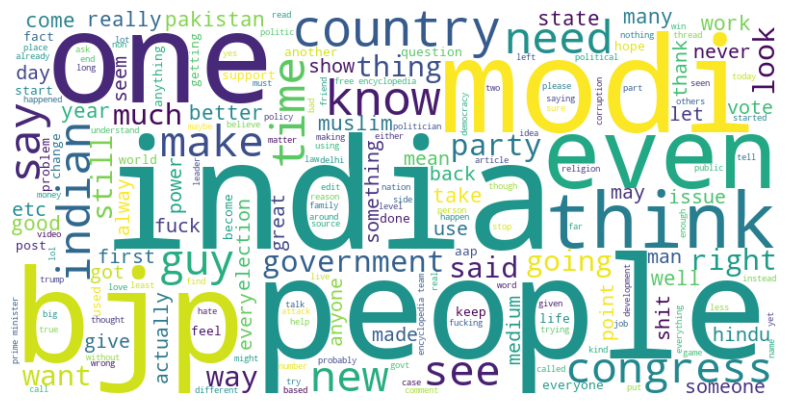

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

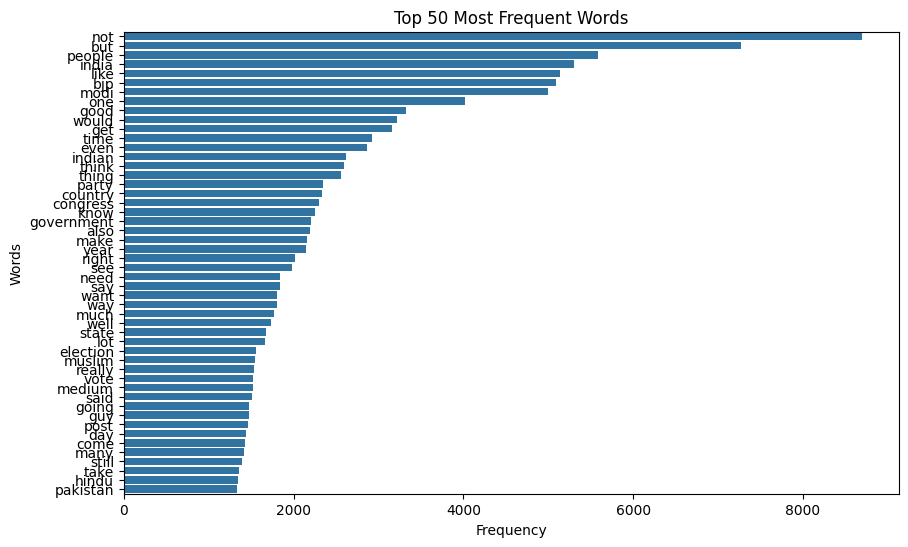

In [127]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

In [130]:
#
df['category'] = df['category'].replace({'Positive': 1, 'Neutral': 0, 'Negative': -1})

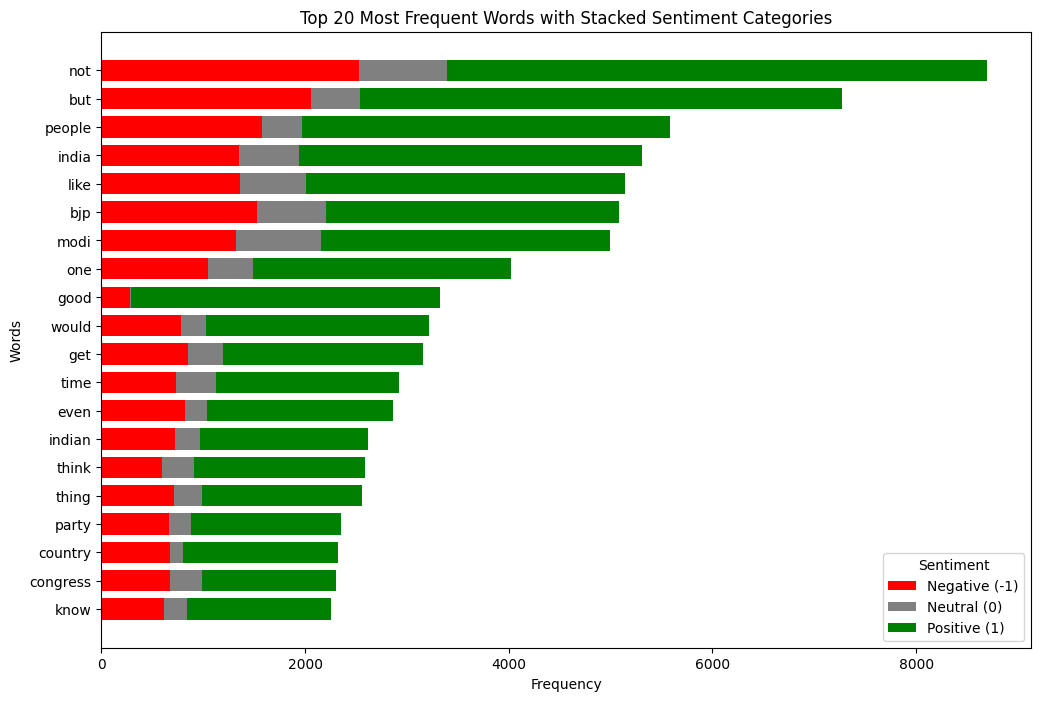

In [131]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)
